In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Setting up the data

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.98901338, -0.21299916,  1.10184311,  4.09137369,  4.21523109,
        4.5107906 ,  6.83287066,  6.69802371,  9.50421739, 11.08937776])

In [4]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([0.69760388, 1.97546043, 2.392341  , 4.17153878, 5.66000269,
       5.79652956, 5.51964212, 7.9727254 , 8.767118  , 9.80253336])

# Plotting the data

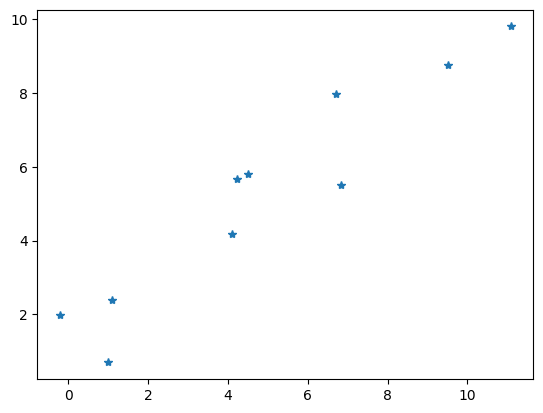

In [5]:
plt.plot(x_data, y_label, '*')

# Assigning the variables

In [6]:
val = np.random.rand(2)

In [7]:
print(val[0])
print(val[1])

0.8793613032056116
0.8589328662810813


In [8]:
m = tf.Variable(val[0])
b = tf.Variable(val[1])

# Applying the cost function

* Cost is the difference between the actual value and the predicted value.

In [9]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m * x + b #Our predicted value
    error += (y - y_hat) ** 2 #The cost we want to minimize (we'll need to use an optimization function for the minimization)

# Applying the optimization function

In [10]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

# Intializing the variables

In [11]:
init = tf.compat.v1.global_variables_initializer()

# Creating the session and running the computation

In [13]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)

    #Fetch Batch Results
    final_slope, final_intercept = sess.run([m,b])

# Printing the slope and the intercept

In [14]:
final_slope

0.8179319164752108

In [15]:
final_intercept

1.1721428082464174

# Model Evaluation

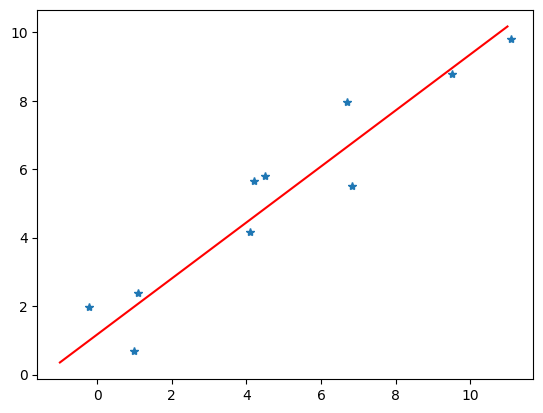

In [17]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')